In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Dataset

In [3]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Mestrado/Datasets/oportunidades_classificacao_4.xlsx", sheet_name='Oportunidades')

In [ ]:
import requests
import pandas as pd
url = 'https://github.com/chap0lin/nlp_datasets/blob/master/oportunidades_classificacao_4.xlsx?raw=true'
r = requests.get(url)
open('temp.xlsx', 'wb').write(r.content)
data = pd.read_excel('temp.xlsx', sheet_name='Oportunidades')

In [4]:
print(data.shape)
data.sample(5)

(357, 11)


,opo_titulo,link,opo_texto,opo_texto_ele,opo_brazil,opo_tipo,opo_deadline,codigo,atualizacao,clas,comentario
300,"School of Medicine PhD Scholarship ""Drivers in...",https://euraxess.ec.europa.eu//jobs/funding/sc...,Outline Applications are currently being accep...,Outline Applications are currently being accep...,N,other,Open until suitable candidate is found,euraxess_210602_1_097,210602,NaN,NÃO FOI POSSIVEL DETERMINAR
249,15 phd positions in Quantum Science in an Mari...,https://euraxess.ec.europa.eu//jobs/funding/15...,"In this project, chemistry, solid state- and q...","In this project, chemistry, solid state- and q...",N,other,Positions open from now to at the latest Oct. ...,euraxess_210602_1_046,210602,NaN,NÃO FOI POSSIVEL DETERMINAR
100,Bolsa de PD em Plasma de Quarks e Glúons,http://fapesp.br/oportunidades/Control/../expl...,The group of heavy ions at the University of S...,The group of heavy ions at the University of S...,Y,scholarship,30/05/2021,fapesp_210429_1_030,210429,Y,0
198,Research Fellowships for Health Professionals,https://wellcome.org/grant-funding/schemes/res...,Research Fellowships for Health ProfessionalsS...,Who can applyYou can apply for a Research Fell...,Y,fellowship,"Preliminary application deadline30 June 2020, ...",wellcome_210429_01_019,210429,Y,0
98,Bolsa de PD em Geometria Diferencial,http://fapesp.br/oportunidades/Control/../teor...,The research group on Caliber Theory and Algeb...,The research group on Caliber Theory and Algeb...,Y,scholarship,23/05/2021,fapesp_210429_1_028,210429,Y,0


In [5]:
data['clas'].value_counts()

Y    152
N    108
Name: clas, dtype: int64

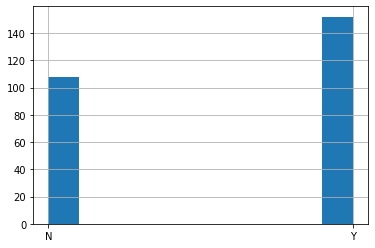

In [6]:
data['clas'].hist()

In [7]:
sentences = data['opo_texto']
labels = data['clas']

In [8]:
print(len(sentences), " - ", len(labels))

357  -  357


In [9]:
newdata = data.copy()
# subSampleBalanced.drop(subSampleBalanced[subSampleBalanced['category'] == 'business'].sample(frac=0.9).index)
# newdata = newdata.drop(newdata[newdata['clas'] != 'Y' or newdata['clas'] != 'N'].index)
# df[(df.line_race != 0) & (df.line_race != 10)]
newdata = newdata[(newdata['clas'] == 'Y') | (newdata['clas'] == 'N')]
sentences = newdata['opo_texto']
labels = newdata['clas']
print(len(sentences), " - ", len(labels))

260  -  260


In [10]:
labels = np.where(labels == "Y", 1, 0)

## Pré-processamento / Text Normalization

## Feature Engineering

### Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.20, random_state=32)

Calculando vocab size

In [12]:
alltext = ""
for s in x_train:
  alltext+= s
for s in x_test:
  alltext+= s

vocab = nltk.word_tokenize(alltext)
vocab1 = set(vocab)
print(len(vocab1))

12881


One hot encoding

In [13]:
my_vocab_size = len(vocab1)
encoded_sent_train = [one_hot(i, my_vocab_size) for i in x_train]
encoded_sent_test = [one_hot(i, my_vocab_size) for i in x_test]
print(encoded_sent_train[0])

[11699, 269, 8099, 1987, 127, 11699, 8099, 771, 12259, 5627, 3281, 4769, 11036, 74, 4435, 7453, 11153, 5510, 3354, 4900, 31, 11718, 246, 6257, 4113, 12762, 11526, 1718, 6997, 12076, 11414, 2366, 5156, 7119, 2780, 6257, 771, 8099, 484, 11526, 5479, 11721, 4990, 12259, 6542, 12076, 339, 5156, 4435, 2259, 3886, 3707, 4990, 269, 8099, 771, 5627, 6929, 1488, 7160, 771, 544, 10113, 4113, 12076, 11923, 6925, 10292, 2366, 11501, 12076, 11700, 1987, 4909, 4435, 2259, 3886, 8771, 1987, 11745, 6925, 11526, 9864, 1987, 9573, 8042, 7574, 7097, 9649, 771, 3928, 11237, 8876, 1372, 7742, 771, 11526, 5129, 11153, 9718, 74, 1987, 1789, 1987, 2366, 12873, 2259, 5627, 235, 4435, 11700, 11699, 11923, 2941, 9405, 6925, 1835, 2366, 11501, 558, 6701, 6971, 4717, 6173, 7202, 4645, 9405, 4611, 1353, 2146, 771, 8594, 4435, 1987, 127, 12076, 1049, 4902, 10696, 2036, 4113, 3208, 4990, 2259, 1987, 9380, 6722, 4693, 999, 8771, 74, 4435, 4113, 3208, 12076, 1049, 4482, 1209, 1353, 1139, 9622, 3491, 8990, 4113, 4990, 1

In [14]:
max_size = 0
for sent in encoded_sent_train:
  if len(sent) > max_size:
    max_size = len(sent)
for sent in encoded_sent_test:
  if len(sent) > max_size:
    max_size = len(sent)
print(max_size)

5302


In [15]:
length = max_size
X_train = pad_sequences(encoded_sent_train, maxlen=length, padding='pre')
X_test = pad_sequences(encoded_sent_test, maxlen=length, padding='pre')
print(X_train)

[[    0     0     0 ...  4754 12811  1009]
 [    0     0     0 ...  4470 12748  3403]
 [    0     0     0 ...    74 11220  1049]
 ...
 [    0     0     0 ...  4435  5597  9304]
 [    0     0     0 ...  1737  7299  5777]
 [    0     0     0 ...    74  4435  4247]]


## Modelo

In [30]:
mymodel = Sequential()
mymodel.add(Embedding(my_vocab_size, 128, input_length=length))
# mymodel.add(Dropout(0.2))
mymodel.add(GlobalMaxPool1D()) 
# mymodel.add(Dropout(0.2))
mymodel.add(Dense(50, activation='relu'))
# mymodel.add(Dropout(0.2))
mymodel.add(Dense(50, activation='relu'))
mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))

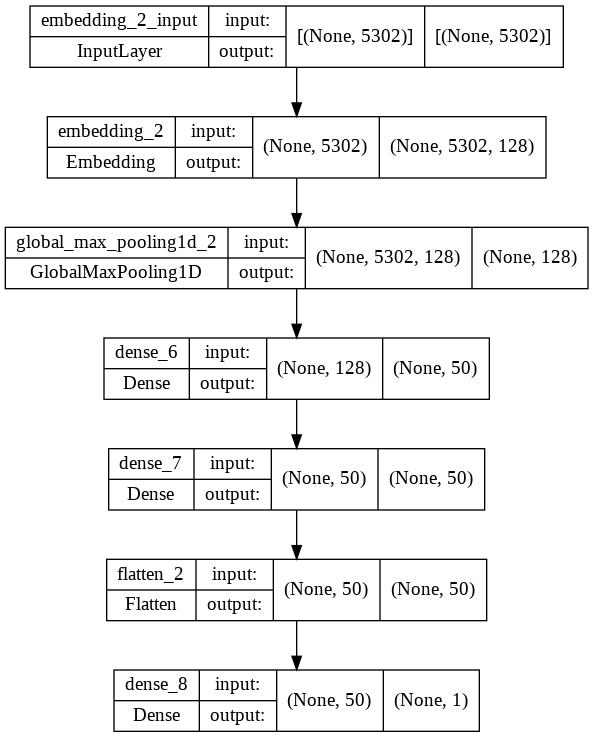

In [22]:
keras.utils.plot_model(mymodel, show_shapes=True)

In [31]:
# add checkpoint to save the network and stop if training doesn't improve
filepath = "best weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
callbacks_list = [checkpoint]

mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fiting  the model
history = mymodel.fit(X_train, y_train, epochs=100, callbacks=callbacks_list, verbose=True, validation_data=(X_test, y_test), batch_size=128)

# evaluate the model
modelloss, modelaccuracy = mymodel.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4567
Epoch 1: val_accuracy improved from -inf to 0.55769, saving model to best weights.h5
2/2 [==============================] - 1s 367ms/step - loss: 0.6938 - accuracy: 0.4567 - val_loss: 0.6909 - val_accuracy: 0.5577
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.5913
Epoch 2: val_accuracy did not improve from 0.55769
2/2 [==============================] - 0s 117ms/step - loss: 0.6883 - accuracy: 0.5913 - val_loss: 0.6889 - val_accuracy: 0.5577
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5913
Epoch 3: val_accuracy did not improve from 0.55769
2/2 [==============================] - 0s 113ms/step - loss: 0.6846 - accuracy: 0.5913 - val_loss: 0.6869 - val_accuracy: 0.5577
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.5913
Epoch 4: val_accuracy did not improve from 0.55769
2/2

In [32]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

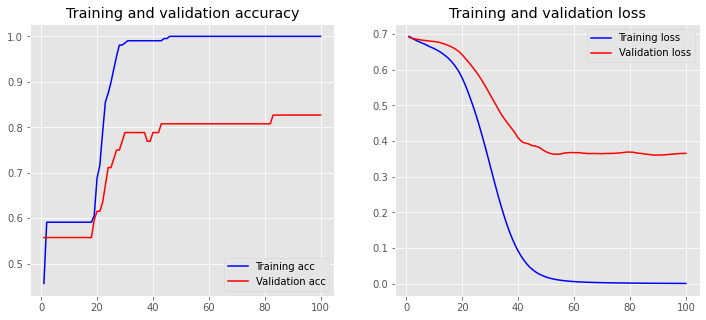

In [33]:
plot_history(history)